# STATISTICAL DISTTRIBUTION

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

In [3]:
df = pd.read_csv('titanic _dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
#to get mean Age population:
population_mean = df ["Age"].mean()
population_mean

30.272590361445783

In [5]:
#using sample of 50 pple:
sample = df.sample (n = 50, random_state = 27)

sample_mean = sample.Age.mean()
sample_mean

29.83125

In [6]:
sample_100 = df.sample (n=100, random_state = 24)

sample_100_mean = sample_100.Age.mean()
sample_100_mean

31.333291139240504

In [ ]:
sample_160 = df.sample (n=160, random_state = 22)
# Calculate the sample 160 mean
sample_160_mean = sample_160.Age.mean()
sample_160_mean

30.212846153846154

In [ ]:
#percent error, difference between the sample and population
error = np.abs(sample_160_mean - population_mean)

# Divide by the population mean to find a percent error
percent_error = error / population_mean * 100
percent_error

0.1973541308698734

# STATISTICAL DISTRIBUTIONS & USE CASES
very often, distributions are described using their statistical mean (or expected value) and variance of the data, but this is not always the case.


# The Probability Mass Function (PMF)


In [11]:
#PMF
x = [100, 100, 200, 300, 500, 900]
from collections import Counter

counter = Counter(x)
print(counter)

Counter({100: 2, 200: 1, 300: 1, 500: 1, 900: 1})


In [12]:
total_length = len(x)
print(total_length)

6


In [13]:
#to calc probability
def prob (x_i):
    frequency = counter[x_i]
    return frequency/total_length

In [15]:
#to calculate mean,use list comprehension
mu = sum((prob (x_i) * x_i) for x_i in set (x))
print (mu)

350.0


In [16]:
# mean using numPy
x_array = np.array(x)
x_array.mean()


350.0

In [19]:
# To calculate variance
variance = sum(prob(x_i)*((x_i - mu)**2) for x_i in set (x))
print (variance)

79166.66666666666


# The Probability Density Function (PDF)

In [20]:
df = pd.read_csv (r'weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


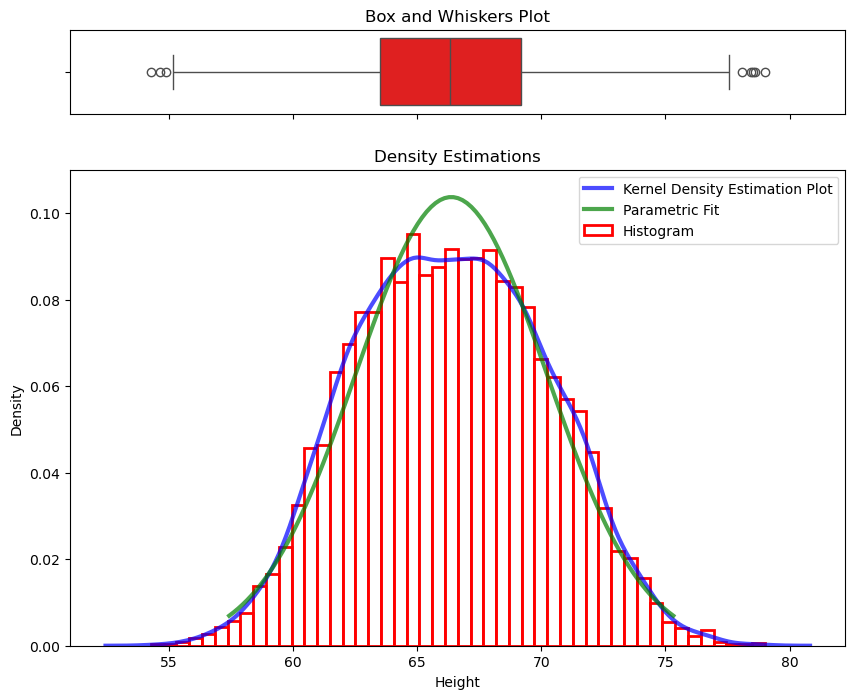

In [23]:
# Create two vertical subplots sharing 15% and 85% of plot space
# sharex allows sharing of axes i.e. building multiple plots on same axes
fig, (ax, ax2) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize = (10,8) )

sns.histplot(df.Height,
             linewidth=2,
             edgecolor="r",
             alpha=0.4,
             color="w",
             label="Histogram",
             stat="density",
             ax=ax2)


sns.kdeplot(df.Height,
           linewidth=3,
           color="b",
           alpha=0.7,
           label="Kernel Density Estimation Plot",
           ax=ax2)

mean = df.Height.mean()
std = df.Height.std()
parametric_dist = stats.norm(loc=mean, scale=std)
x = np.linspace(parametric_dist.ppf(0.01), parametric_dist.ppf(0.99), 100)

ax2.plot(x,
         parametric_dist.pdf(x),
            color="g",
            alpha=0.7,
            linewidth=3,
            label="Parametric Fit")

ax2.set_title('Density Estimations')

sns.boxplot(x=df.Height, ax = ax,color = 'red')
ax.set_title('Box and Whiskers Plot')
ax2.set(ylim=(0, 0.08))
plt.ylim(0, 0.11)
plt.legend();

# Interpolation (reading assgnt)